# MLP

In [4]:
import pandas as pd 
import numpy as np
import argparse
import math
import string
from collections.abc import Iterable
from collections import Counter
import pandas as pd 

import argparse
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from tensorflow import keras
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import classification_report
import os
from sklearn.model_selection import train_test_split
print(os.getcwd())

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [8]:


folder_path = '/content/drive/MyDrive/Vulnerability Prediction/Processed Datasets/'

#function to load and prepare dataset training labels 
def load_data(path, column, rdm_state):
    dataframe = pd.read_csv(path)
    
    y = dataframe[column].astype(int) # numberize the labels i.e., tranforms True = 1, False = 0
    print("Label Distribution: ")
    print(y.value_counts())

    y = y.values 
    
    X = dataframe.iloc[:, 7:]
    num_features = len(X.columns) 
    X = X.values

    #X = np.reshape(X, (len(X), num_features, 1)) 


    print("Dataset: ")
    print(f"\nShape of features: {X.shape} (# samples, # features, channel) of type {type(X)}" )
    print(f"Shape of labels: {y.shape} (# samples, ) of type {type(X)}" )
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=rdm_state)

    return X_train, X_test, y_train, y_test


def run_acccuracy(model, X, y):
  loss, acc = model.evaluate(X, y, verbose=0)
  print(f'Test Accuracy: {acc*100}')


def generate_roc_plot(model, x_test, y_test):
  # Generate a prediction using model.predict() 
  # and calculate it's shape:
  print("Generate a prediction")
  prediction = model.predict(x_test).ravel()
  print("prediction shape:", prediction.shape)

  fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)
  auc_keras = auc(fpr_keras, tpr_keras)

  #generate plot
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras, tpr_keras, label=' (area = {:.3f})'.format(auc_keras))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

def mlp_model(num_features):

    # define the keras model
    model = Sequential()
    model.add(Dense(10, input_dim=num_features, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile the keras model
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
X_cwe_119_train, X_cwe_119_test, y_cwe_119_train, y_cwe_119_test = load_data(folder_path + 'cwe_119_train.csv', 'CWE-119', 42)

mlp_cwe_119 = mlp_model(1533)
mlp_cwe_119 = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_119_model.ph')

Label Distribution: 
1    2710
0    2710
Name: CWE-119, dtype: int64
Dataset: 

Shape of features: (5420, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (5420,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                15340     
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the keras model on the dataset
#history = mlp_cwe_119.fit(X_cwe_119_train, y_cwe_119_train, epochs=10, batch_size=10, verbose=2)


Epoch 1/10
488/488 - 1s - loss: 0.3375 - accuracy: 0.8670 - 1s/epoch - 3ms/step
Epoch 2/10
488/488 - 1s - loss: 0.3343 - accuracy: 0.8700 - 1s/epoch - 3ms/step
Epoch 3/10
488/488 - 1s - loss: 0.3397 - accuracy: 0.8682 - 1s/epoch - 3ms/step
Epoch 4/10
488/488 - 1s - loss: 0.3315 - accuracy: 0.8717 - 1s/epoch - 3ms/step
Epoch 5/10
488/488 - 1s - loss: 0.3325 - accuracy: 0.8741 - 1s/epoch - 3ms/step
Epoch 6/10
488/488 - 1s - loss: 0.3304 - accuracy: 0.8743 - 1s/epoch - 3ms/step
Epoch 7/10
488/488 - 1s - loss: 0.3353 - accuracy: 0.8721 - 1s/epoch - 3ms/step
Epoch 8/10
488/488 - 1s - loss: 0.3246 - accuracy: 0.8793 - 1s/epoch - 3ms/step
Epoch 9/10
488/488 - 1s - loss: 0.3249 - accuracy: 0.8784 - 1s/epoch - 3ms/step
Epoch 10/10
488/488 - 1s - loss: 0.3247 - accuracy: 0.8713 - 1s/epoch - 3ms/step


Test Accuracy: 87.63837814331055
Generate a prediction
prediction shape: (542,)


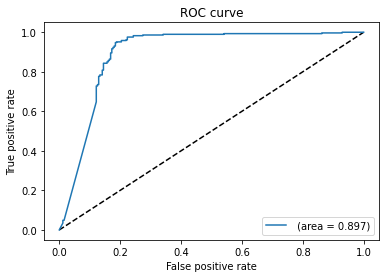

In [11]:
run_acccuracy(mlp_cwe_119, X_cwe_119_test, y_cwe_119_test)
generate_roc_plot(mlp_cwe_119, X_cwe_119_test, y_cwe_119_test)

In [ ]:
#mlp_cwe_119.save('/scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_119_model.ph')

2022-04-20 11:29:05.800053: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_119_model.ph/assets


# CWE 120

In [12]:
X_cwe_120_train, X_cwe_120_test, y_cwe_120_train, y_cwe_120_test = load_data(folder_path + 'cwe_120_train.csv', 'CWE-120', 45)
cwe_120_model = mlp_model(1533)
cwe_120_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_120_model.ph')

Label Distribution: 
1    5159
0    5159
Name: CWE-120, dtype: int64
Dataset: 

Shape of features: (10318, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (10318,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                15340     
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history = cwe_120_model.fit(X_cwe_120_train, y_cwe_120_train, epochs=30, verbose=2)

Epoch 1/30
291/291 - 1s - loss: 0.2951 - accuracy: 0.8919 - 849ms/epoch - 3ms/step
Epoch 2/30
291/291 - 1s - loss: 0.2897 - accuracy: 0.8952 - 830ms/epoch - 3ms/step
Epoch 3/30
291/291 - 1s - loss: 0.2915 - accuracy: 0.8919 - 897ms/epoch - 3ms/step
Epoch 4/30
291/291 - 1s - loss: 0.2954 - accuracy: 0.8909 - 912ms/epoch - 3ms/step
Epoch 5/30
291/291 - 1s - loss: 0.3002 - accuracy: 0.8922 - 810ms/epoch - 3ms/step
Epoch 6/30
291/291 - 1s - loss: 0.2894 - accuracy: 0.8937 - 851ms/epoch - 3ms/step
Epoch 7/30
291/291 - 1s - loss: 0.2859 - accuracy: 0.8959 - 820ms/epoch - 3ms/step
Epoch 8/30
291/291 - 1s - loss: 0.2827 - accuracy: 0.8986 - 812ms/epoch - 3ms/step
Epoch 9/30
291/291 - 1s - loss: 0.2842 - accuracy: 0.8942 - 808ms/epoch - 3ms/step
Epoch 10/30
291/291 - 1s - loss: 0.2947 - accuracy: 0.8916 - 879ms/epoch - 3ms/step
Epoch 11/30
291/291 - 1s - loss: 0.2866 - accuracy: 0.8926 - 859ms/epoch - 3ms/step
Epoch 12/30
291/291 - 1s - loss: 0.2845 - accuracy: 0.8963 - 777ms/epoch - 3ms/step
E

Test Accuracy: 87.40310072898865
Generate a prediction
prediction shape: (1032,)


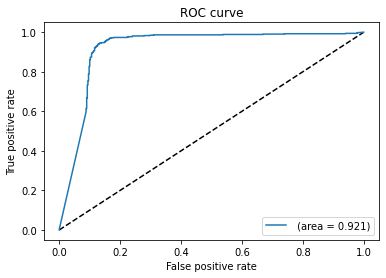

In [13]:
run_acccuracy(cwe_120_model, X_cwe_120_test, y_cwe_120_test)
generate_roc_plot(cwe_120_model, X_cwe_120_test, y_cwe_120_test)

In [ ]:
#cwe_120_model.save('/scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_120_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_120_model.ph/assets


# CWE 469

In [14]:
X_cwe_469_train, X_cwe_469_test, y_cwe_469_train, y_cwe_469_test = load_data(folder_path + 'cwe_469_train.csv', 'CWE-469', 40)
cwe_469_model = mlp_model(1533)
cwe_469_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_469_model.ph')

Label Distribution: 
1    324
0    324
Name: CWE-469, dtype: int64
Dataset: 

Shape of features: (648, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (648,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                15340     
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
#history = cwe_469_model.fit(X_cwe_469_train, y_cwe_469_train, epochs=40, verbose=2)

Epoch 1/40
19/19 - 0s - loss: 40.6596 - accuracy: 0.4974 - 313ms/epoch - 16ms/step
Epoch 2/40
19/19 - 0s - loss: 17.0366 - accuracy: 0.5986 - 49ms/epoch - 3ms/step
Epoch 3/40
19/19 - 0s - loss: 10.5093 - accuracy: 0.6775 - 57ms/epoch - 3ms/step
Epoch 4/40
19/19 - 0s - loss: 6.7381 - accuracy: 0.7084 - 53ms/epoch - 3ms/step
Epoch 5/40
19/19 - 0s - loss: 4.5964 - accuracy: 0.7479 - 57ms/epoch - 3ms/step
Epoch 6/40
19/19 - 0s - loss: 3.2765 - accuracy: 0.7787 - 56ms/epoch - 3ms/step
Epoch 7/40
19/19 - 0s - loss: 2.1681 - accuracy: 0.8165 - 52ms/epoch - 3ms/step
Epoch 8/40
19/19 - 0s - loss: 1.5172 - accuracy: 0.8370 - 52ms/epoch - 3ms/step
Epoch 9/40
19/19 - 0s - loss: 1.4879 - accuracy: 0.8422 - 53ms/epoch - 3ms/step
Epoch 10/40
19/19 - 0s - loss: 1.3436 - accuracy: 0.8473 - 57ms/epoch - 3ms/step
Epoch 11/40
19/19 - 0s - loss: 0.8721 - accuracy: 0.8765 - 52ms/epoch - 3ms/step
Epoch 12/40
19/19 - 0s - loss: 0.5540 - accuracy: 0.9039 - 55ms/epoch - 3ms/step
Epoch 13/40
19/19 - 0s - loss: 0

Test Accuracy: 63.07692527770996
Generate a prediction
prediction shape: (65,)


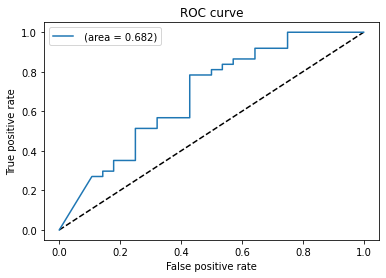

In [15]:
run_acccuracy(cwe_469_model, X_cwe_469_test, y_cwe_469_test)
generate_roc_plot(cwe_469_model, X_cwe_469_test, y_cwe_469_test)

In [ ]:
#cwe_469_model.save('/scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_469_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_469_model.ph/assets


# CWE 476

In [16]:
X_cwe_476_train, X_cwe_476_test, y_cwe_476_train, y_cwe_476_test = load_data(folder_path + 'cwe_476_train.csv', 'CWE-476', 40)
cwe_476_model = mlp_model(1533)
cwe_476_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_476_model.ph')

Label Distribution: 
1    1174
0    1174
Name: CWE-476, dtype: int64
Dataset: 

Shape of features: (2348, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (2348,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                15340     
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
#history = cwe_476_model.fit(X_cwe_476_train, y_cwe_476_train, epochs=30, verbose=2)

Epoch 1/30
67/67 - 0s - loss: 0.2825 - accuracy: 0.9072 - 203ms/epoch - 3ms/step
Epoch 2/30
67/67 - 0s - loss: 0.2918 - accuracy: 0.9001 - 185ms/epoch - 3ms/step
Epoch 3/30
67/67 - 0s - loss: 0.2633 - accuracy: 0.9158 - 188ms/epoch - 3ms/step
Epoch 4/30
67/67 - 0s - loss: 0.2516 - accuracy: 0.9248 - 189ms/epoch - 3ms/step
Epoch 5/30
67/67 - 0s - loss: 0.2505 - accuracy: 0.9224 - 192ms/epoch - 3ms/step
Epoch 6/30
67/67 - 0s - loss: 0.2934 - accuracy: 0.9186 - 182ms/epoch - 3ms/step
Epoch 7/30
67/67 - 0s - loss: 0.2865 - accuracy: 0.9158 - 185ms/epoch - 3ms/step
Epoch 8/30
67/67 - 0s - loss: 0.2504 - accuracy: 0.9191 - 180ms/epoch - 3ms/step
Epoch 9/30
67/67 - 0s - loss: 0.2432 - accuracy: 0.9153 - 192ms/epoch - 3ms/step
Epoch 10/30
67/67 - 0s - loss: 0.2281 - accuracy: 0.9229 - 184ms/epoch - 3ms/step
Epoch 11/30
67/67 - 0s - loss: 0.2224 - accuracy: 0.9276 - 173ms/epoch - 3ms/step
Epoch 12/30
67/67 - 0s - loss: 0.2139 - accuracy: 0.9219 - 171ms/epoch - 3ms/step
Epoch 13/30
67/67 - 0s - 

Test Accuracy: 85.53191423416138
Generate a prediction
prediction shape: (235,)


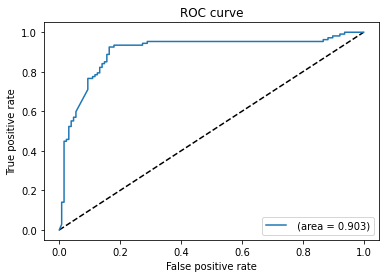

In [17]:
run_acccuracy(cwe_476_model, X_cwe_476_test, y_cwe_476_test)
generate_roc_plot(cwe_476_model, X_cwe_476_test, y_cwe_476_test)

In [ ]:
#cwe_476_model.save('/scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_476_model.ph')

INFO:tensorflow:Assets written to: /scratch365/palarcon/Vulnerability Project/MLP/mlp_cwe_476_model.ph/assets


# CWE Other

In [18]:
X_cwe_other_train, X_cwe_other_test, y_cwe_other_train, y_cwe_other_test = load_data(folder_path + 'cwe_other_train.csv', 'CWE-other', 40)
cwe_other_model = mlp_model(1533)
cwe_other_model = keras.models.load_model('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_120_model.ph')

Label Distribution: 
1    3314
0    3314
Name: CWE-other, dtype: int64
Dataset: 

Shape of features: (6628, 1533) (# samples, # features, channel) of type <class 'numpy.ndarray'>
Shape of labels: (6628,) (# samples, ) of type <class 'numpy.ndarray'>
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                15340     
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 15,351
Trainable params: 15,351
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit network
history = cwe_other_model.fit(X_cwe_other_train, y_cwe_other_train, epochs=30, verbose=2)

Epoch 1/30
187/187 - 1s - loss: 103.1153 - accuracy: 0.5656 - 911ms/epoch - 5ms/step
Epoch 2/30
187/187 - 0s - loss: 35.3338 - accuracy: 0.5982 - 356ms/epoch - 2ms/step
Epoch 3/30
187/187 - 0s - loss: 17.6765 - accuracy: 0.6050 - 343ms/epoch - 2ms/step
Epoch 4/30
187/187 - 0s - loss: 9.2168 - accuracy: 0.5953 - 356ms/epoch - 2ms/step
Epoch 5/30
187/187 - 0s - loss: 4.9260 - accuracy: 0.5666 - 353ms/epoch - 2ms/step
Epoch 6/30
187/187 - 0s - loss: 2.6959 - accuracy: 0.5531 - 345ms/epoch - 2ms/step
Epoch 7/30
187/187 - 0s - loss: 1.6527 - accuracy: 0.5393 - 350ms/epoch - 2ms/step
Epoch 8/30
187/187 - 0s - loss: 1.3591 - accuracy: 0.5393 - 363ms/epoch - 2ms/step
Epoch 9/30
187/187 - 0s - loss: 1.0347 - accuracy: 0.5375 - 363ms/epoch - 2ms/step
Epoch 10/30
187/187 - 0s - loss: 0.9067 - accuracy: 0.5360 - 350ms/epoch - 2ms/step
Epoch 11/30
187/187 - 0s - loss: 1.0373 - accuracy: 0.5311 - 334ms/epoch - 2ms/step
Epoch 12/30
187/187 - 0s - loss: 0.7957 - accuracy: 0.5400 - 365ms/epoch - 2ms/st

Test Accuracy: 53.99698615074158
Generate a prediction
prediction shape: (663,)


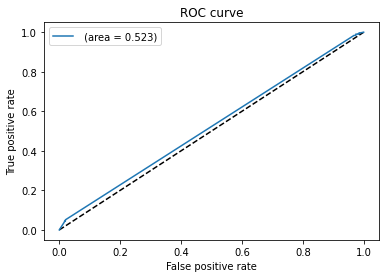

In [20]:
run_acccuracy(cwe_other_model, X_cwe_other_test, y_cwe_other_test)
generate_roc_plot(cwe_other_model, X_cwe_other_test, y_cwe_other_test)

In [21]:
#cwe_other_model.save('/content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_120_model.ph')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Vulnerability Prediction/MLP/mlp_cwe_120_model.ph/assets


# Inference and Validation

In [ ]:
def generate_roc_plots(models, x_test, y_test, names):
  # Generate a prediction using model.predict() 
  # and calculate it's shape:
    
    fpr, tpr, aucs = [], [], []
    
    #Generate a prediction
    for i in range(len(models)):
        model = models[i]
        pred = model.predict(x_test[i]).ravel()
        
        fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test[i], pred)
        auc_keras = auc(fpr_keras, tpr_keras)
        
        fpr.append(fpr_keras)
        tpr.append(tpr_keras)
        aucs.append(auc_keras)

    
    #generate plot
    plt.figure(figsize=(9,9))
    plt.plot([0, 1], [0, 1], 'k--')
    for i in range(len(models)):
        plt.plot(fpr[i], tpr[i], label=' {} (area = {:.3f})'.format(names[i],aucs[i]))
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

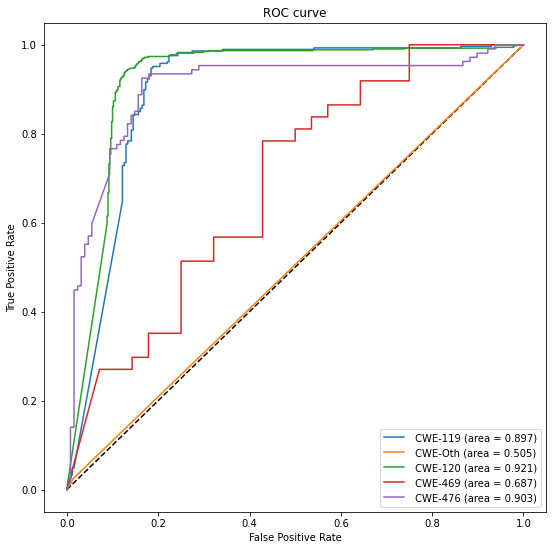

In [ ]:
mod = [mlp_cwe_119, cwe_other_model, cwe_120_model, cwe_469_model, cwe_476_model]
x_tests = [X_cwe_119_test, X_cwe_other_test, X_cwe_120_test, X_cwe_469_test, X_cwe_476_test]
y_tests = [y_cwe_119_test, y_cwe_other_test, y_cwe_120_test, y_cwe_469_test, y_cwe_476_test]
names = ['CWE-119', 'CWE-Oth', 'CWE-120', 'CWE-469','CWE-476']
generate_roc_plots(mod, x_tests, y_tests, names)

In [ ]:
def classificationReport(model, X, y):
    # make a prediction on the test set
    yhat = model.predict(X)
    # round probabilities to class labels
    yhat = yhat.round()
    
    print(classification_report(y, yhat))

In [ ]:
for i in range(len(mod)):
    print(names[i])
    classificationReport(mod[i], x_tests[i], y_tests[i])

CWE-119
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       255
           1       0.85      0.93      0.89       287

    accuracy                           0.88       542
   macro avg       0.88      0.87      0.88       542
weighted avg       0.88      0.88      0.88       542

CWE-Oth
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       349
           1       0.64      0.02      0.04       314

    accuracy                           0.53       663
   macro avg       0.58      0.51      0.37       663
weighted avg       0.58      0.53      0.38       663

CWE-120
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.90      0.85      0.87       532

    accuracy                           0.87      1032
   macro avg       0.87      0.87      0.87      1032
weighted avg       0.88      0.87      0.87      1